In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

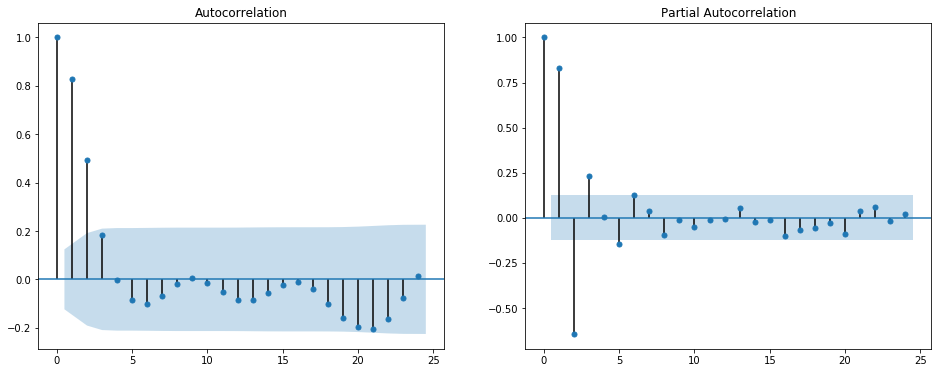

In [5]:
# generate ARMA model
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma, 250)
# plot the ACF and PACF
fig,axes = plt.subplots(1,2,figsize = (16,6))
sm.graphics.tsa.plot_acf(y,ax = axes[0])
sm.graphics.tsa.plot_pacf(y, ax = axes[1])
plt.show()

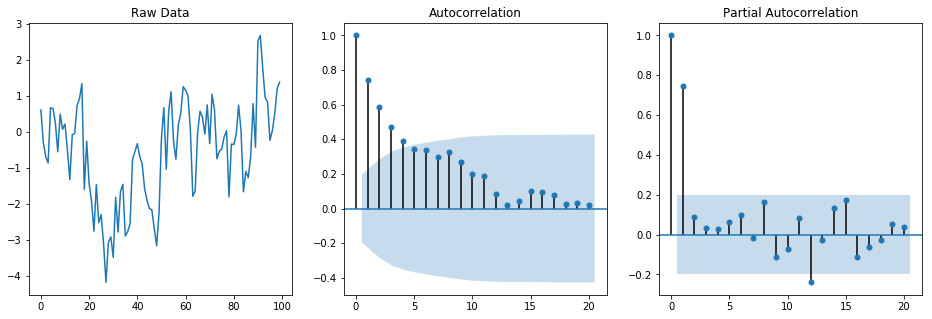

In [6]:
# load data
data = pd.read_excel('./data/sim_2.xls')

# plot ACF and PACF
y1 = np.array(data['Y1'])
fig,axes = plt.subplots(1,3,figsize = (16,5))
axes[0].plot(y1)
axes[0].set_title("Raw Data")
sm.graphics.tsa.plot_acf(y1,ax = axes[1])
sm.graphics.tsa.plot_pacf(y1, ax = axes[2])
plt.show()

In [7]:
ar1 = sm.tsa.ARMA(y1,(1,0)).fit(trend='nc')
arma1 = sm.tsa.ARMA(y1,(1,1)).fit(trend='nc')

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 0)   Log Likelihood                -134.392
Method:                       css-mle   S.D. of innovations              0.923
Date:                Tue, 30 Jul 2019   AIC                            272.783
Time:                        10:37:28   BIC                            277.993
Sample:                             0   HQIC                           274.892
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7840      0.061     12.921      0.000       0.665       0.903
                                    Roots                                    
                  Real          Imaginary           M

In [8]:
r1 = ar1.resid
r2 = arma1.resid
r1_acf = pd.DataFrame(sm.tsa.acf(r1,qstat=True)).T
r1_acf.columns=["ACF", "Q", "Prob(>Q)"]
r2_acf = pd.DataFrame(sm.tsa.acf(r2,qstat=True)).T
r2_acf.columns=["ACF", "Q", "Prob(>Q)"]

D:\anaconda\envs\dataServer\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [9]:
print('{:^50}'.format('Results'))
print("-"*50)
print('{:^10}{:^20}{:^20}'.format("","Model 1","Model 2"))
print('{:^10}{:^20}{:^20}'.format("","ARMA(1,0)","ARMA(1,1)"))
print("-"*50)
print('{:^10}{:^20}{:^20}'.format("a1","0.7840 (0.061)","0.8384 (0.069)"))
print('{:^10}{:^20}{:^20}'.format("b1"," ","-0.1463 (0.133)"))
print('{:^10}{:^20}{:^20}'.format("AIC,BIC","272.783, 277.993","273.585, 281.401"))
print('{:^10}{:^20}{:^20}'.format("Q(1)",r1_acf.iloc[1,1].round(4),r2_acf.iloc[1,1].round(4)))
print('{:^10}{:^20}{:^20}'.format("p{>Q(1)}",r1_acf.iloc[1,2].round(4),r2_acf.iloc[1,2].round(4)))
print('{:^10}{:^20}{:^20}'.format("Q(8)",r1_acf.iloc[8,1].round(4),r2_acf.iloc[8,1].round(4)))
print('{:^10}{:^20}{:^20}'.format("p{>Q(8)}",r1_acf.iloc[8,2].round(4),r2_acf.iloc[8,2].round(4)))
print("-"*50)

                     Results                      
--------------------------------------------------
                Model 1             Model 2       
               ARMA(1,0)           ARMA(1,1)      
--------------------------------------------------
    a1       0.7840 (0.061)      0.8384 (0.069)   
    b1                          -0.1463 (0.133)   
 AIC,BIC    272.783, 277.993    273.585, 281.401  
   Q(1)          0.9541              0.1121       
 p{>Q(1)}        0.6206              0.9455       
   Q(8)          6.8905              5.7741       
 p{>Q(8)}        0.6485              0.7623       
--------------------------------------------------


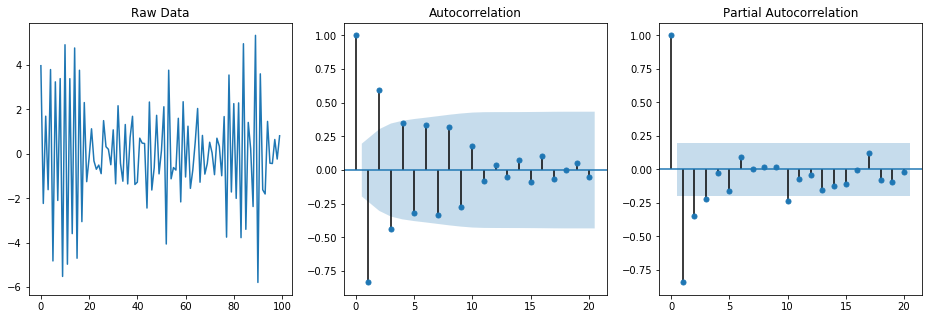

In [10]:
y2 = np.array(data['Y2'])
fig,axes = plt.subplots(1,3,figsize = (16,5))
axes[0].plot(y2)
axes[0].set_title("Raw Data")
sm.graphics.tsa.plot_acf(y2,ax = axes[1])
sm.graphics.tsa.plot_pacf(y2, ax = axes[2])
plt.show()

In [11]:
ar2 = sm.tsa.ARMA(y2,(1,0)).fit(trend='nc')
arma2 = sm.tsa.ARMA(y2,(1,1)).fit(trend='nc')
ar22 = sm.tsa.ARMA(y2,(2,0)).fit(trend='nc')
print(ar2.summary())
print("*"*78)
print(arma2.summary())
print("*"*78)
print(ar22.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 0)   Log Likelihood                -166.350
Method:                       css-mle   S.D. of innovations              1.269
Date:                Tue, 30 Jul 2019   AIC                            336.700
Time:                        10:37:49   BIC                            341.910
Sample:                             0   HQIC                           338.808
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.8502      0.052    -16.249      0.000      -0.953      -0.748
                                    Roots                                    
                  Real          Imaginary           M

In [12]:
r1 = ar2.resid
r2 = arma2.resid
r3 = ar22.resid
r1_acf = pd.DataFrame(sm.tsa.acf(r1,qstat=True)).T
r1_acf.columns=["ACF", "Q", "Prob(>Q)"]
r2_acf = pd.DataFrame(sm.tsa.acf(r2,qstat=True)).T
r2_acf.columns=["ACF", "Q", "Prob(>Q)"]
r3_acf = pd.DataFrame(sm.tsa.acf(r3,qstat=True)).T
r3_acf.columns=["ACF", "Q", "Prob(>Q)"]

In [52]:
print('{:^70}'.format('Results'))
print("-"*70)
print('{:^10}{:^20}{:^20}{:^20}'.format("","Model 1","Model 2", "Model 3"))
print('{:^10}{:^20}{:^20}{:^20}'.format("","ARMA(1,0)","ARMA(1,1)","ARMA(2,0)"))
print("-"*70)
print('{:^10}{:^20}{:^20}{:^20}'.format("a1","-0.8502","-0.7086"," -1.1774"))
print('{:^10}{:^20}{:^20}{:^20}'.format("","(0.052)","(0.078)"," (0.093)"))
print('{:^10}{:^20}{:^20}{:^20}'.format("a2","","","-0.3841"))
print('{:^10}{:^20}{:^20}{:^20}'.format("","","","(0.093)"))
print('{:^10}{:^20}{:^20}{:^20}'.format("b1"," ","-0.6649",""))
print('{:^10}{:^20}{:^20}{:^20}'.format(""," ","(0.095)",""))
print('{:^10}{:^20}{:^20}{:^20}'.format("AIC","336.700","312.304", "323.013"))
print('{:^10}{:^20}{:^20}{:^20}'.format("BIC","3341.910","320.119", "330.828"))
print('{:^10}{:^20}{:^20}{:^20}'.format("Q(1)",r1_acf.iloc[1,1].round(4),r2_acf.iloc[1,1].round(4),r3_acf.iloc[1,1].round(4)))
print('{:^10}{:^20}{:^20}{:^20}'.format("",r1_acf.iloc[1,2].round(4),r2_acf.iloc[1,2].round(4),r3_acf.iloc[1,2].round(4)))
print('{:^10}{:^20}{:^20}{:^20}'.format("Q(8)",r1_acf.iloc[8,1].round(4),r2_acf.iloc[8,1].round(4),r3_acf.iloc[8,1].round(4)))
print('{:^10}{:^20}{:^20}{:^20}'.format("",r1_acf.iloc[8,2].round(4),r2_acf.iloc[8,2].round(4),r3_acf.iloc[8,2].round(4)))
print("-"*70)

                               Results                                
----------------------------------------------------------------------
                Model 1             Model 2             Model 3       
               ARMA(1,0)           ARMA(1,1)           ARMA(2,0)      
----------------------------------------------------------------------
    a1          -0.8502             -0.7086              -1.1774      
                (0.052)             (0.078)              (0.093)      
    a2                                                  -0.3841       
                                                        (0.093)       
    b1                              -0.6649                           
                                    (0.095)                           
   AIC          336.700             312.304             323.013       
   BIC          3341.910            320.119             330.828       
   Q(1)         10.9206              0.4785              3.6041       
      

### Interest Spread

In [289]:
quarter = pd.read_excel('./data/quarterly.xls')
dta = pd.DataFrame(quarter['r5']-quarter['Tbill'],columns=['Gap'])
dta.index =pd.date_range('1960','2013',freq="Q")

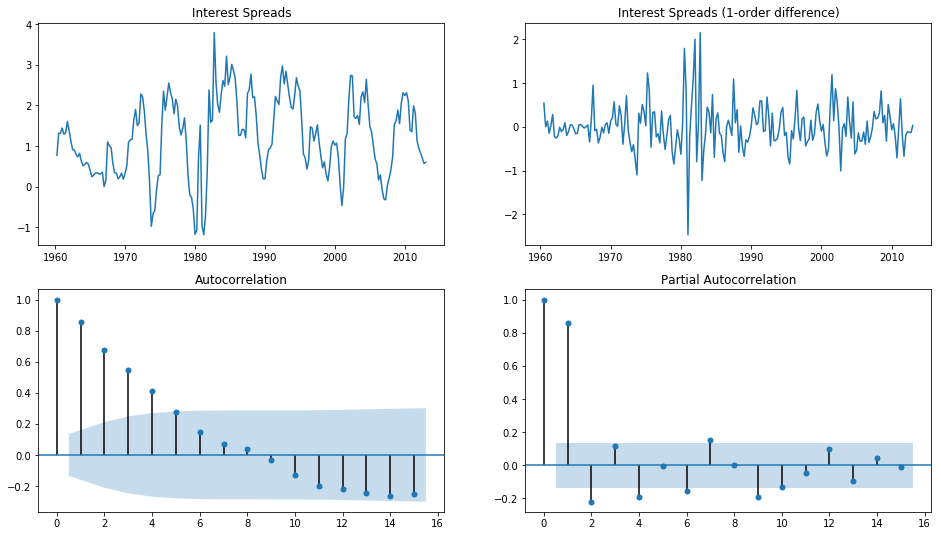

In [294]:
y = dta['Gap']
y_1 = dta.diff()
fig,axes = plt.subplots(2,2,figsize = (16,9))
axes[0][0].plot(dta)
axes[0][0].set_title("Interest Spreads")
axes[0][1].plot(y_1)
axes[0][1].set_title("Interest Spreads (1-order difference)")
sm.graphics.tsa.plot_acf(y,ax = axes[1][0],lags=15)
sm.graphics.tsa.plot_pacf(y, ax = axes[1][1],lags=15)
plt.show()

In [295]:
m1 = sm.tsa.statespace.SARIMAX(y,trend = "c", order=(7,0,0)).fit(disp=False)
m2 = sm.tsa.statespace.SARIMAX(y,trend = "c", order=(6,0,0)).fit(disp=False)
m3 = sm.tsa.statespace.SARIMAX(y,trend = "c", order=(2,0,0)).fit(disp=False)
m4 = sm.tsa.statespace.SARIMAX(y,trend = "c", order=(1,0,1)).fit(disp=False)
m5 = sm.tsa.statespace.SARIMAX(y,trend = "c", order=(2,0,1)).fit(disp=False)
m6 = sm.tsa.statespace.SARIMAX(dta,trend = "c", order=(2,0,(1,0,0,0,0,0,1))).fit(disp=False)
m7 = sm.tsa.statespace.SARIMAX(dta,trend = "c", order=((1,1,0,0,0,0,1),0,0)).fit(disp=False)

In [5]:
def L_B_Q(model,n):
    r = model.resid
    r_acf = pd.DataFrame(sm.tsa.acf(r,qstat=True)).T
    r_acf.columns=["ACF", "Q", "Prob(>Q)"]
    print("Q({}): {}, p:{}".format(n,r_acf.iloc[n,1].round(4),r_acf.iloc[n,2].round(4)))

In [202]:
print(m3.summary())
print("*"*80)
L_B_Q(m3,4)
print("*"*80)
L_B_Q(m3,8)
print("*"*80)
L_B_Q(m3,12)

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  212
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -145.010
Date:                Tue, 30 Jul 2019   AIC                            298.020
Time:                        19:56:51   BIC                            311.446
Sample:                             0   HQIC                           303.447
                                - 212                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2087      0.054      3.889      0.000       0.104       0.314
ar.L1          1.0407      0.056     18.701      0.000       0.932       1.150
ar.L2         -0.2157      0.054     -3.962      0.0

In [161]:
from scipy import stats
import time
def one_step_error(data,order,start = None, end = None):
    dates = pd.date_range(start = start, end=end, freq="Q")
    err_lit = []
    predict = []
    for i,date in enumerate(dates):
        date = date.strftime("%Y-%m-%d")
        model =sm.tsa.statespace.SARIMAX(data[:dates[i-1]],trend = "c", order= order).fit(disp=False)
        pred = model.predict(start=date, end=date)[0]
        predict.append(pred)
        err = data.loc[date][0] - pred
        err_lit.append(err)
    err_df = pd.DataFrame(err_lit,index = dates,columns=["err"])
    err_df["real"] = data[start:]
    err_df["predict"] = predict
    return err_df

def sample_test(err_df1,err_df2):
    err1 = pd.DataFrame(err_df1["err"])
    err2 = pd.DataFrame(err_df2["err"])
    GN = err1 + err2
    GN['z'] = err1 - err2
    GN.columns = ["x","z"]
    corr = GN.corr().iloc[0,1]
    GN_T = corr / np.sqrt((1-corr**2)/49)
    diff = (err1 ** 4).sub((err2 ** 4), axis = 0)
    DM = diff.mean()[0]/ np.sqrt(diff.var()[0]/49)
    return GN_T, DM,diff

In [100]:
start='2000-09-30'
end='2012-12-31'
err1 = one_step_error(dta,(7,0,0),start = start, end = end)
err2 = one_step_error(dta,(2,0,(1,0,0,0,0,0,1)),start = start, end = end)

In [162]:
GN,DM,diff= sample_test(err_df1 = err1,err_df2 = err2)

In [150]:
print("-"*40)
print("{:^10}{:^15}{:^15} ".format("","AR(7)","ARMA(2,(1,7))"))
print("-"*40)
print("{:^10}{:^15}{:^15} ".format("mean",err1['err'].mean().round(4),err2['err'].mean().round(4)))
print("{:^10}{:^15}{:^15} ".format("variance",err1['err'].var().round(4),err2['err'].var().round(4)))
print("{:^10}{:^30}".format("GN(p-value)",str(GN.round(4)) + "(" + str(stats.t.sf(GN,49).round(4)) + ")"))
print("{:^10}{:^30}".format("DM(p_value)",str(DM.round(4)) + "(" + str(stats.t.sf(DM,49).round(4)) + ")"))
print("-"*40)

----------------------------------------
               AR(7)      ARMA(2,(1,7))  
----------------------------------------
   mean       0.0147         0.0133      
 variance     0.1856         0.1685      
GN(p-value)         1.6763(0.05)         
DM(p_value)        2.4216(0.0096)        
----------------------------------------


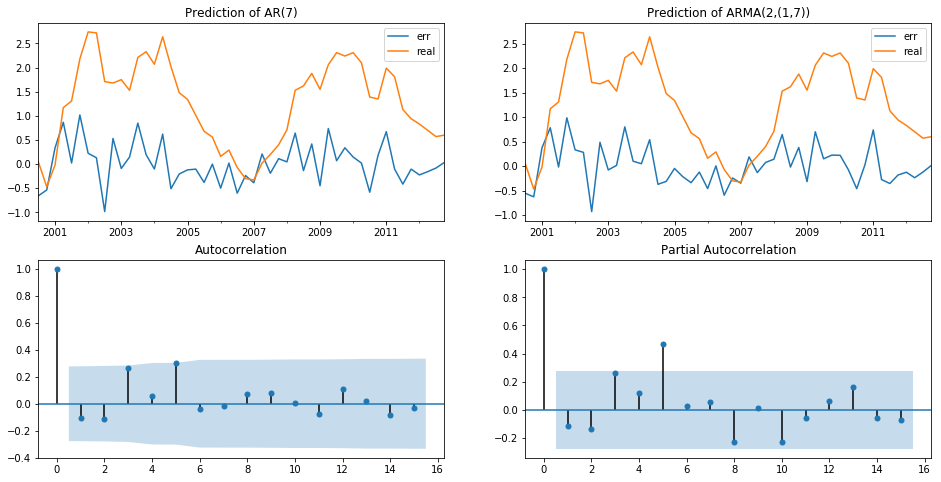

In [167]:
fig,axes = plt.subplots(2,2,figsize = (16,8))
err1[["err","real"]].plot(ax = axes[0][0])
err2[["err","real"]].plot(ax = axes[0][1])
axes[0][0].set_title('Prediction of AR(7)')
axes[0][1].set_title('Prediction of ARMA(2,(1,7))')
sm.graphics.tsa.plot_acf(diff, ax = axes[1][0],lags=15)
sm.graphics.tsa.plot_pacf(diff, ax = axes[1][1],lags=15)
plt.show()

###  Seasonal Data

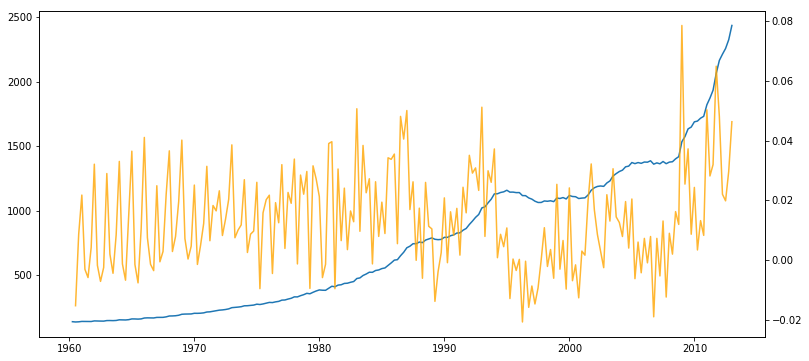

In [239]:
data = pd.read_excel("./data/quarterly.xls")
data.index  = pd.date_range('1960','2013',freq="Q")
m = pd.DataFrame(data["M1NSA"])
m["ln_M1"] = np.log(m)
m["g_M1"] = m["ln_M1"].diff()
m["g_M1_s"] = m['g_M1'].diff(4)
fig,axes = plt.subplots(figsize = (13,6))
axes.plot(m["M1NSA"])
axes1 = axes.twinx()
axes1.plot(m["g_M1"],'orange',alpha = 0.8)
plt.show()

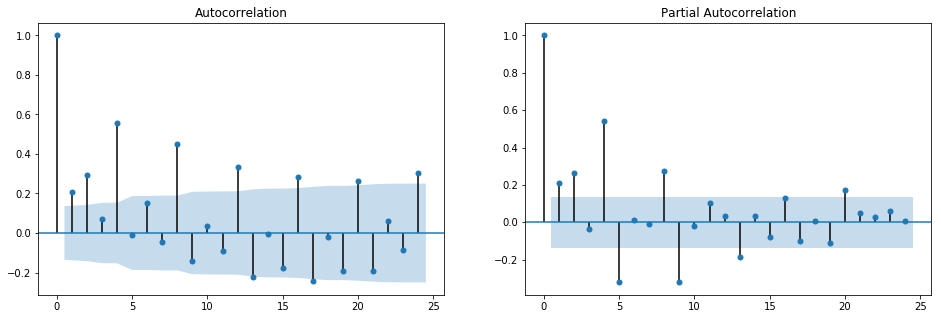

In [237]:
fig,axes = plt.subplots(1,2,figsize= (16,5))
sm.graphics.tsa.plot_acf(m['g_M1'][5:],ax = axes[0])
sm.graphics.tsa.plot_pacf(m['g_M1'][5:], ax = axes[1])
plt.show()

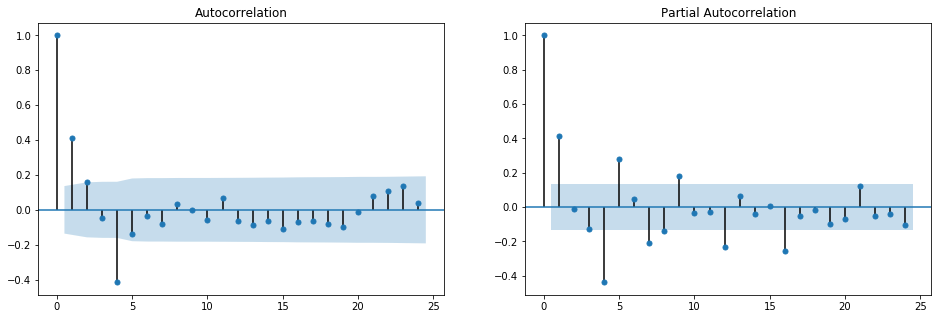

In [238]:
fig,axes = plt.subplots(1,2,figsize= (16,5))
sm.graphics.tsa.plot_acf(m['g_M1_s'][5:],ax = axes[0])
sm.graphics.tsa.plot_pacf(m['g_M1_s'][5:], ax = axes[1])
plt.show()

In [245]:
y = pd.DataFrame(m['g_M1_s'][5:])
m1 = sm.tsa.statespace.SARIMAX(y,trend = "c", order=(1,0,(0,0,0,1))).fit(disp=False)
m2 = sm.tsa.statespace.SARIMAX(y,trend = "c", order=(1,0,0),seasonal_order=(1,0,0,4)).fit(disp=False)
m3 = sm.tsa.statespace.SARIMAX(y,trend = "c", order=(0,0,1),seasonal_order=(0,0,1,4)).fit(disp=False)

In [250]:
print(m3.summary())
print("*"*80)
L_B_Q(m3,4)
print("*"*80)
L_B_Q(m3,8)
print("*"*80)
L_B_Q(m3,12)

                                 Statespace Model Results                                
Dep. Variable:                            g_M1_s   No. Observations:                  207
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 4)   Log Likelihood                 624.281
Date:                           Wed, 31 Jul 2019   AIC                          -1240.561
Time:                                   18:00:34   BIC                          -1227.230
Sample:                               06-30-1961   HQIC                         -1235.170
                                    - 12-31-2012                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.000      1.051      0.293      -0.000       0.001
ma.L1          0.4205      0.070      6.038